In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
print(df.empty)

False


In [17]:
print(df.index)

RangeIndex(start=0, stop=7043, step=1)


In [19]:
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [21]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Encode target column
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [23]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

# Label encode
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results")
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# Evaluate
evaluate_model("Logistic Regression", y_test, lr_preds)


Logistic Regression Results
Accuracy: 81.69%
Confusion Matrix:
[[940  96]
 [162 211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate
evaluate_model("Random Forest", y_test, rf_preds)


Random Forest Results
Accuracy: 79.99%
Confusion Matrix:
[[946  90]
 [192 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: Churn
0    4138
1    1496
Name: count, dtype: int64
After SMOTE: Churn
0    4138
1    4138
Name: count, dtype: int64


## Logistic Regression (after SMOTE) 

In [34]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

lr_preds = lr_model.predict(X_test_scaled)
evaluate_model("Logistic Regression (SMOTE)", y_test, lr_preds)


Logistic Regression (SMOTE) Results
Accuracy: 75.51%
Confusion Matrix:
[[761 275]
 [ 70 303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.52      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



## Random Forest (after SMOTE)

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

rf_preds = rf_model.predict(X_test_scaled)
evaluate_model("Random Forest (SMOTE)", y_test, rf_preds)


Random Forest (SMOTE) Results
Accuracy: 78.78%
Confusion Matrix:
[[889 147]
 [152 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.59      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [42]:
from sklearn.metrics import confusion_matrix

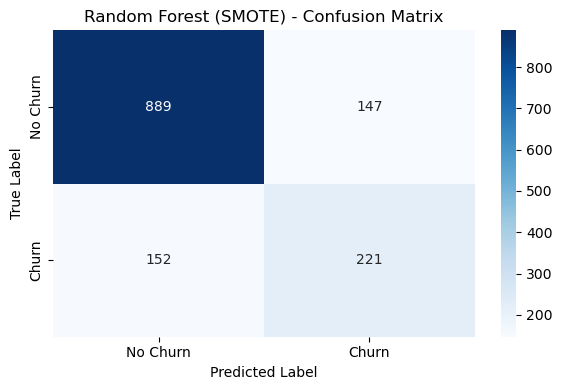

In [44]:
# Create confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Random Forest (SMOTE) - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

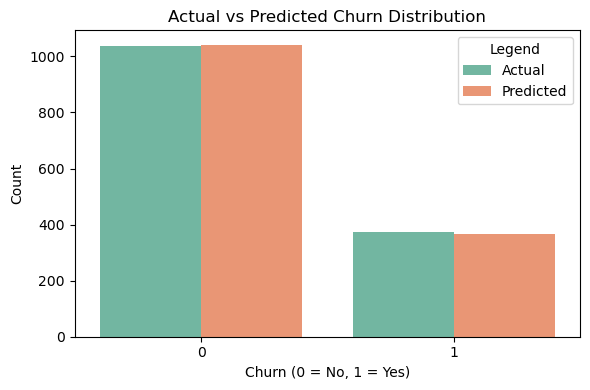

In [46]:

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_preds})

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='value', hue='variable', data=pd.melt(compare_df), palette='Set2')
plt.title("Actual vs Predicted Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Legend', labels=['Actual', 'Predicted'])
plt.tight_layout()
plt.show()

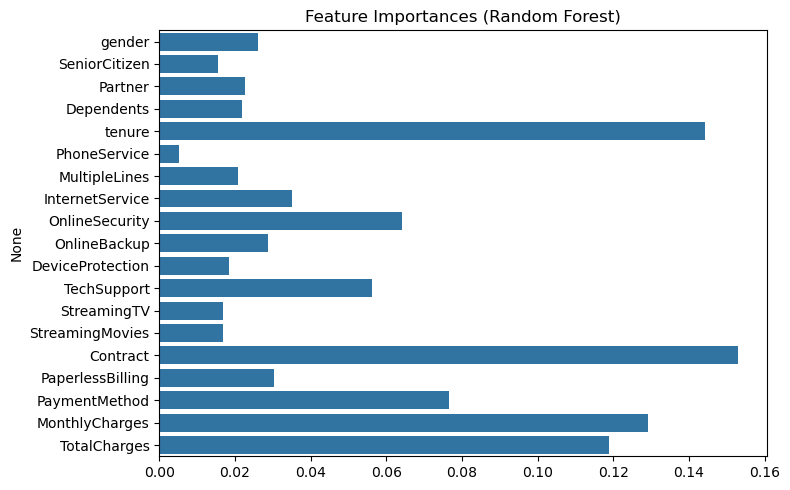

In [51]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [53]:
import joblib
joblib.dump(rf_model, "customer_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']